In [0]:
#This code implementation by Ghada Alshabanat ,Wafaa Alharthi and Hanan Othman .
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import matplotlib.patches as mpatches
import cv2
%matplotlib inline
from skimage.metrics import (adapted_rand_error,variation_of_information)
from skimage.filters import sobel
from skimage.measure import label
from skimage.util import img_as_float
from skimage.feature import canny
from skimage.morphology import remove_small_objects
from skimage.segmentation import (morphological_geodesic_active_contour, inverse_gaussian_gradient,
                                  watershed, mark_boundaries)
from skimage.filters import threshold_otsu
from skimage.morphology import closing, square
from skimage import data
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)
from skimage.color import rgb2gray
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from skimage.filters import threshold_mean
from skimage.segmentation import (morphological_geodesic_active_contour, inverse_gaussian_gradient,
                                  watershed, mark_boundaries)
from itertools import cycle
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

In [0]:
#  to read data from my google drive
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


(300, 300, 3)


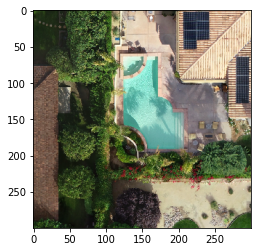

In [0]:

path0 = '/content/gdrive/My Drive/procdata/'
path = path0+'image-chips/'
# read the image 
image = plt.imread(path+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
# print the size of the image 
print(image.shape)
im_test0=image
# show the image
plt.imshow(image)

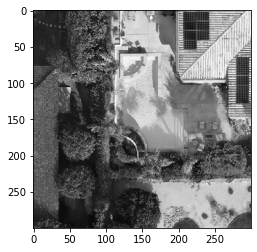

In [0]:
#convert the image to gray level 
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

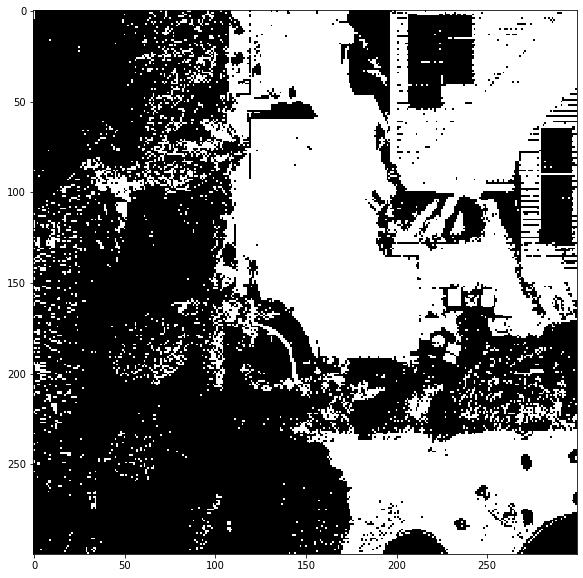

In [0]:
# threshold with mean
image = gray
thresh = threshold_mean(image) # Return threshold value based on the mean of grayscale value 
im_test1 = image > thresh # we use the greater operator> to compure the gray image to the thrash ,the opeator return a binary image 
#to show the image 
fig, ax = plt.subplots(figsize=(10, 10)) #Creates  a figure and change the size of figure .
ax.imshow(im_test1, cmap=plt.cm.gray, interpolation='nearest')

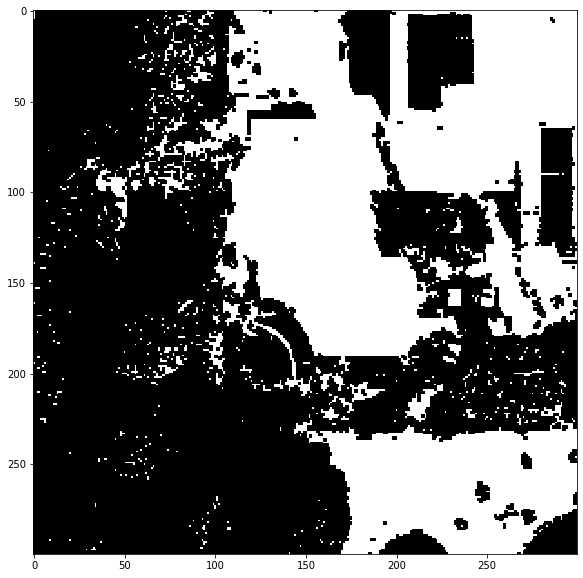

In [0]:
# threshold with otsu
image = gray
thresh = threshold_otsu(image)# uses Otsu’s method to automatically determine the threshold value based on its inputs grayscale image and returns it.
im_test2 = closing(gray > thresh, square(2))#we use the comparison operator > for binary thesholding.
# to show the image 
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(im_test2, cmap=plt.cm.gray, interpolation='nearest')


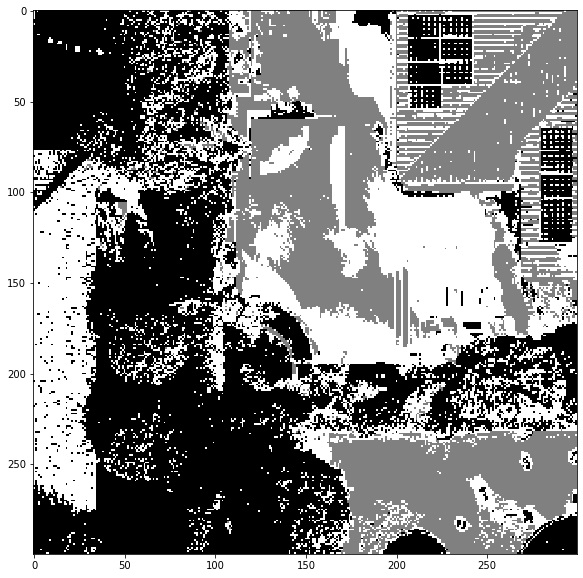

In [0]:
# clustering with K-mean
image_reshaped = np.reshape(image , ( image.shape[0]* image.shape[1] , image.shape[2]))#convert it into a 2-dimensional array whose shape will be (length*width, channels). 
kmeans = KMeans(n_clusters=3, random_state=1000).fit(image_reshaped)#fit the k-means algorithm on this reshaped array and obtain the clusters.
labels = kmeans.labels_
im_test3 = np.reshape(labels, (image.shape[0] , image.shape[1]))
# to show the image 
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(im_test3, cmap=plt.cm.gray, interpolation='nearest')

In [0]:
#  clustering with MeanShift
image_reshaped = np.reshape(image , ( image.shape[0]* image.shape[1] , image.shape[2]))
bandwidth = estimate_bandwidth(image_reshaped, quantile=0.1, n_samples=100)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(image_reshaped)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 8


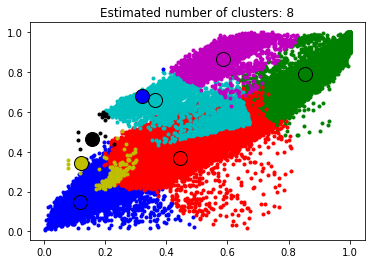

In [0]:

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(image_reshaped[my_members, 0], image_reshaped[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

(90000,)


<Figure size 432x288 with 0 Axes>

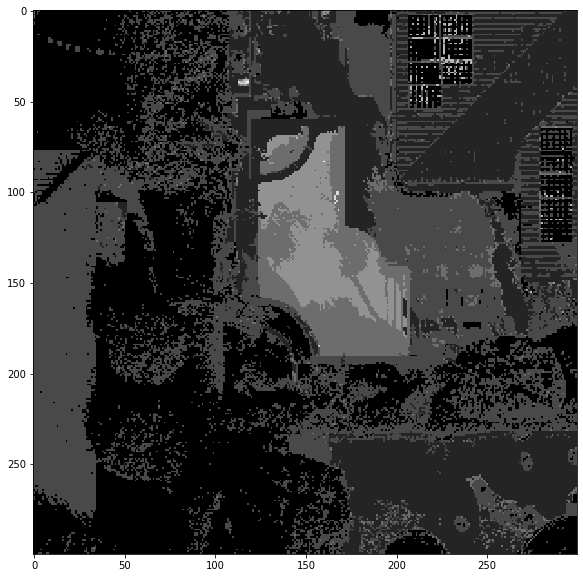

In [0]:

plt.figure(1)
plt.clf()
print(labels.shape)
im_test4 = np.reshape(labels, (image.shape[0] , image.shape[1] )  )
#to show the image 
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(im_test4, cmap=plt.cm.gray, interpolation='nearest')

Text(0.5, 1.0, 'Canny detector')

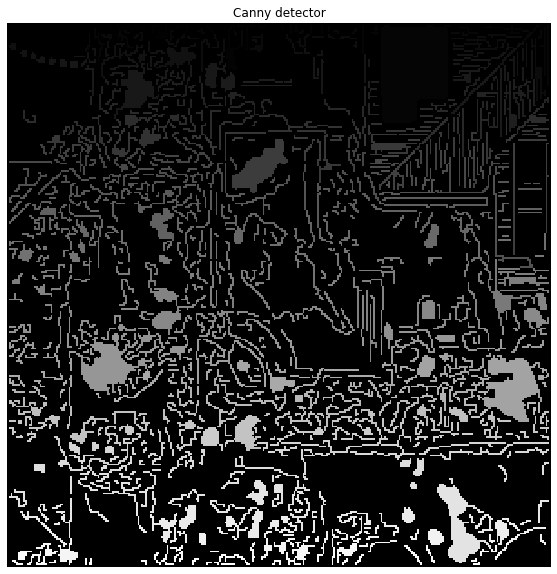

In [0]:
# edge segmentation (canny)
edges = canny(gray)
fill_image = ndi.binary_fill_holes(edges)
im_test5 = ndi.label(remove_small_objects(fill_image, 4))[0]
#to show the image 
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(im_test5, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('Canny detector')

Text(0.5, 1.0, 'watershed')

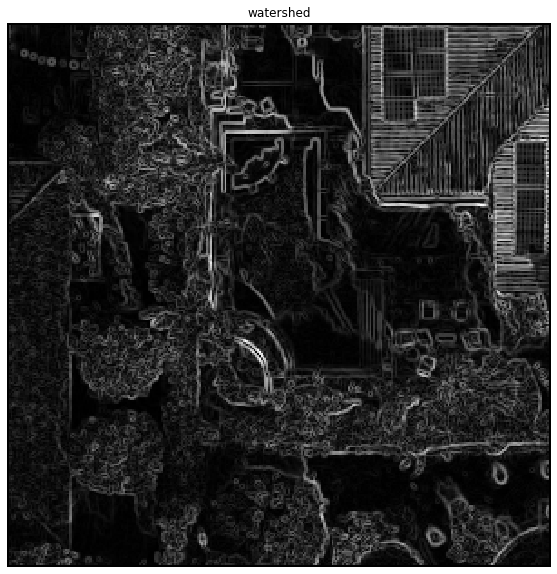

In [0]:
# watershed segmentation 
edges = sobel(gray)
im_test6 = watershed(edges, markers=10, compactness=0)
# to show the image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('watershed')

Text(0.5, 1.0, '')

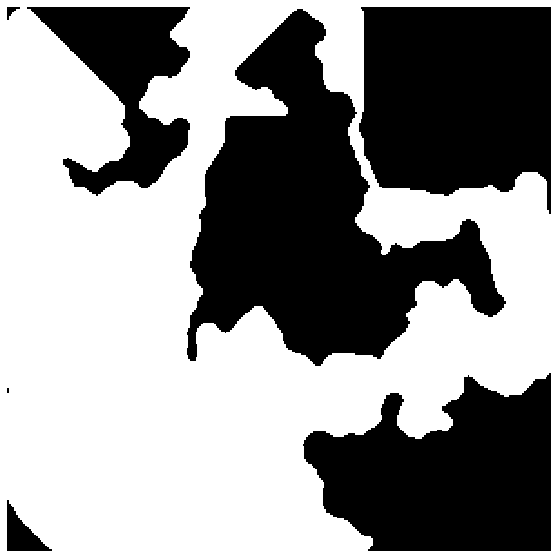

In [0]:
# morphological segmentation 
def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store
image = img_as_float(gray)
init_ls = checkerboard_level_set(image.shape, 100)
evolution = []
callback = store_evolution_in(evolution)
im_test7 = morphological_chan_vese(image, 100, init_level_set=init_ls, smoothing=2,
                             iter_callback=callback)
im_test7 = label(im_test7)
# to show the image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(im_test7, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('')

In [0]:
#generate the true segmentatio
elevation_map = sobel(gray)
markers = np.zeros_like(gray)
markers[gray > 220/255] = 0
markers[gray > 130/255] = 1
markers[gray > 20/255] = 2
markers[gray > 140/255] = 3
markers[gray > 170/255] = 4
markers[gray > 90/255] = 0
im_true = watershed(elevation_map, markers)
im_true = ndi.label(ndi.binary_fill_holes(im_true - 1))[0]



## Method: threshold with mean
Adapted Rand error: 32.554059888894734
Adapted Rand precision: 50.88183656361613
False Splits: 0.9872322045010314
False Merges: 0.0

## Method: threshold with ostu
Adapted Rand error: 31.315049480669988
Adapted Rand precision: 52.30546749284869
False Splits: 0.9664709281409959
False Merges: 6.288682163269005e-17

## Method: cluster with K-mean
Adapted Rand error: 48.868341789157675
Adapted Rand precision: 34.34689847171141
False Splits: 1.5630132254877243
False Merges: 5.2575347653172e-17

## Method: cluster with meanshift
Adapted Rand error: 55.39786648088405
Adapted Rand precision: 28.701895675384048
False Splits: 1.9695452045658475
False Merges: 0.0

## Method: Canny filter
Adapted Rand error: 26.51210749104631
Adapted Rand precision: 58.087636010770495
False Splits: 2.956919573743119
False Merges: 2.1640925714660723e-18

## Method: Compact watershed
Adapted Rand error: 24.218305949846286
Adapted Rand precision: 61.006864866399745
False Splits: 1.0506

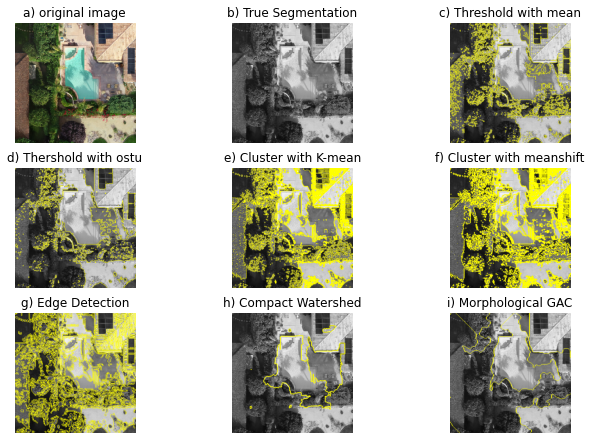

In [0]:
#for  compute the  error,precision,False Splits and False Merges
method_names = ['threshold with mean','threshold with ostu','cluster with K-mean','cluster with meanshift',
                 'Canny filter','Compact watershed','Morphological Geodesic Active Contours',]

short_method_names = ['mean','ostu','k-mean','meanshift','Canny','Compact WS', 'GAC']

precision_list = []
recall_list = []
split_list = []
merge_list = []
for name, im_test in zip(method_names, [im_test1, im_test2, im_test3,im_test4,im_test5,im_test6,im_test7]):
    error, precision, recall = adapted_rand_error(im_true, im_test)
    splits, merges = variation_of_information(im_true, im_test)
    split_list.append(splits)
    merge_list.append(merges)
    precision_list.append(precision)
    recall_list.append(recall)
    print(f"\n## Method: {name}")
    print(f"Adapted Rand error: {error*100}")
    print(f"Adapted Rand precision: {precision*100}")
    #print(f"Adapted Rand recall: {recall}")
    print(f"False Splits: {splits}")
    print(f"False Merges: {merges}")

fig, axes = plt.subplots(3, 3, figsize=(9, 6), constrained_layout=True)
ax = axes.ravel()

# to show the orignal
ax[0].imshow(im_test0)
ax[0].set_title('a) original image')
ax[0].set_axis_off()


# to show the True Segmentation
ax[1].imshow(mark_boundaries(image, im_true))
ax[1].set_title('b) True Segmentation')
ax[1].set_axis_off()

# to show threshold with mean 
ax[2].imshow(mark_boundaries(image, im_test1))
ax[2].set_title('c) Threshold with mean')
ax[2].set_axis_off()

# to show thershold with ostu 
ax[3].imshow(mark_boundaries(image, im_test2))
ax[3].set_title('d) Thershold with ostu')
ax[3].set_axis_off()

# to show cluster with K-mean 
ax[4].imshow(mark_boundaries(image, im_test3))
ax[4].set_title('e) Cluster with K-mean')
ax[4].set_axis_off()

# to show cluster with meanshift  
ax[5].imshow(mark_boundaries(image, im_test4))
ax[5].set_title('f) Cluster with meanshift')
ax[5].set_axis_off()

# to show Edge Detection
ax[6].imshow(mark_boundaries(image, im_test5))
ax[6].set_title('g) Edge Detection')
ax[6].set_axis_off()

# to show Compact Watershed
ax[7].imshow(mark_boundaries(image, im_test6))
ax[7].set_title('h) Compact Watershed')
ax[7].set_axis_off()

# to show Morphological GAC
ax[8].imshow(mark_boundaries(image, im_test7))
ax[8].set_title('i) Morphological GAC')
ax[8].set_axis_off()




plt.show()

